In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import rasterio as rio
import earthpy as et
from PIL import Image
import geopandas as gpd

In [3]:
# get the absolute path of the current notebook
notebook_path = os.path.abspath("readfiles.ipynb")
print(notebook_path)
# open the example .tif file (k19)
if os.path.exists("../Data/DHMVIIDSMRAS1m_k19/GeoTIFF/DHMVIIDSMRAS1m_k19.tif"):
    tif_file = "../Data/DHMVIIDSMRAS1m_k19/GeoTIFF/DHMVIIDSMRAS1m_k19.tif"
    print("found tif file")
if os.path.exists("../Data/DHMVIIDSMRAS1m_k19/DHMVII_vdc_k19/DHMVII_vdc_k19.shp"):
    shape_file = "../Data/DHMVIIDSMRAS1m_k19/DHMVII_vdc_k19/DHMVII_vdc_k19.shp"
    print("found shape file")

/home/becode/Projects/3D-House-Project/Code/readfiles.ipynb
found tif file
found shape file


In [4]:
# Make a raster from the .tif file and get some initial information
georaster = rio.open(tif_file)

print(georaster.name)
print(georaster.count)
print(georaster.width)
print(georaster.height)
print(georaster.bounds)
print(georaster.crs)

../Data/DHMVIIDSMRAS1m_k19/GeoTIFF/DHMVIIDSMRAS1m_k19.tif
1
17000
20000
BoundingBox(left=17000.0, bottom=178000.0, right=34000.0, top=198000.0)
EPSG:31370


NotImplementedError: It is not currently possible to manually set the aspect on 3D axes

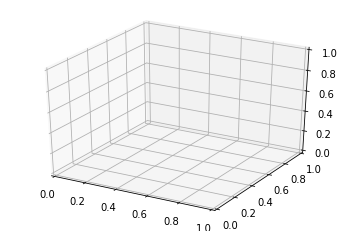

In [48]:
# Center of Sint-Marinus Kerk in Leisele is at X:27326.04 Y:187447.37
# Top Left is at X:27280.19 Y:187468.36
# Bottom Right is at X:27333.87 Y:187427.64
kerk_box = ( 
    # bottom left corner
    27280.19, 187427.64,
    # top right corner
    27333.87, 187468.36
)

fig = plt.figure()
dim3_ax = fig.gca(projection='3d')

kerk_leisele = gpd.read_file(shape_file, bbox=kerk_box)
kerk_leisele = kerk_leisele.translate()
kerk_leisele = kerk_leisele.to_crs(georaster.crs)
kerk_leisele.plot(ax=dim3_ax, aspect='auto')
#surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
#                       linewidth=0, antialiased=False)